<a href="https://colab.research.google.com/github/tinugh/ML-project/blob/main/Football_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTING FOOTBALL MATCH WINNERS

IMPORTING PYHTON LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
#importing visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/raw.githubusercontent.com_dataquestio_project-walkthroughs_master_football_matches_matches.csv')

In [ ]:
#head
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [ ]:
#columns
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

DATA CLEANING

In [ ]:
#dtypes
df.dtypes

Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [ ]:
#match report
df['match report'].value_counts()
#only 1 data match report

Match Report    1389
Name: match report, dtype: int64

In [ ]:
#notes
df['notes'].value_counts()
#so full of missing values

Series([], Name: notes, dtype: int64)

In [ ]:
#comp
df['comp'].value_counts()
#only one data

Premier League    1389
Name: comp, dtype: int64

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1389 non-null   int64  
 1   date          1389 non-null   object 
 2   time          1389 non-null   object 
 3   comp          1389 non-null   object 
 4   round         1389 non-null   object 
 5   day           1389 non-null   object 
 6   venue         1389 non-null   object 
 7   result        1389 non-null   object 
 8   gf            1389 non-null   float64
 9   ga            1389 non-null   float64
 10  opponent      1389 non-null   object 
 11  xg            1389 non-null   float64
 12  xga           1389 non-null   float64
 13  poss          1389 non-null   float64
 14  attendance    693 non-null    float64
 15  captain       1389 non-null   object 
 16  formation     1389 non-null   object 
 17  referee       1389 non-null   object 
 18  match report  1389 non-null 

In [ ]:
#selecting only required columns for machine learning
new_df=df[['round','venue','result','gf','ga','opponent','xg','xga','poss','sh','sot','dist','fk','pk','pkatt','season','team']]
new_df

,round,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,season,team
0,Matchweek 1,Away,L,0.0,1.0,Tottenham,1.9,1.3,64.0,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,Matchweek 2,Home,W,5.0,0.0,Norwich City,2.7,0.1,67.0,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,Matchweek 3,Home,W,5.0,0.0,Arsenal,3.8,0.1,80.0,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,Matchweek 4,Away,W,1.0,0.0,Leicester City,2.9,0.8,61.0,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,Matchweek 5,Home,D,0.0,0.0,Southampton,1.1,0.4,63.0,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,Matchweek 34,Away,L,0.0,4.0,Tottenham,0.5,2.0,34.0,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
1385,Matchweek 35,Home,L,0.0,2.0,Crystal Palace,0.7,2.1,50.0,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
1386,Matchweek 36,Away,W,1.0,0.0,Everton,1.6,1.3,38.0,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
1387,Matchweek 37,Away,L,0.0,1.0,Newcastle Utd,0.8,1.5,50.0,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


In [ ]:
#team count
tc=df.groupby('team')['team'].count()
res=df.groupby('result')['result'].count()
res

result
D    315
L    548
W    526
Name: result, dtype: int64

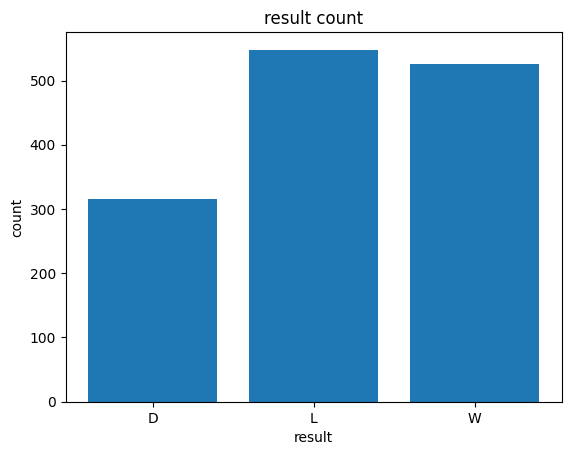

In [ ]:
import matplotlib.pyplot as plt
#graphically representation
plt.bar(res.index, res.values)
plt.title('result count')
plt.xlabel('result')
plt.ylabel('count')
plt.xticks()
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Chelsea'),
  Text(2, 0, 'Arsenal'),
  Text(3, 0, 'Tottenham Hotspur'),
  Text(4, 0, 'Manchester United'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Leicester City'),
  Text(7, 0, 'Aston Villa'),
  Text(8, 0, 'Wolverhampton Wanderers'),
  Text(9, 0, 'Leeds United'),
  Text(10, 0, 'Everton'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Southampton'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Liverpool'),
  Text(15, 0, 'Brighton and Hove Albion'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Brentford'),
  Text(18, 0, 'Sheffield United'),
  Text(19, 0, 'Watford'),
  Text(20, 0, 'Norwich City'),
  Text(21, 0, 'Fulham'),
  Text(22, 0, 'West Bromwich Albion')])

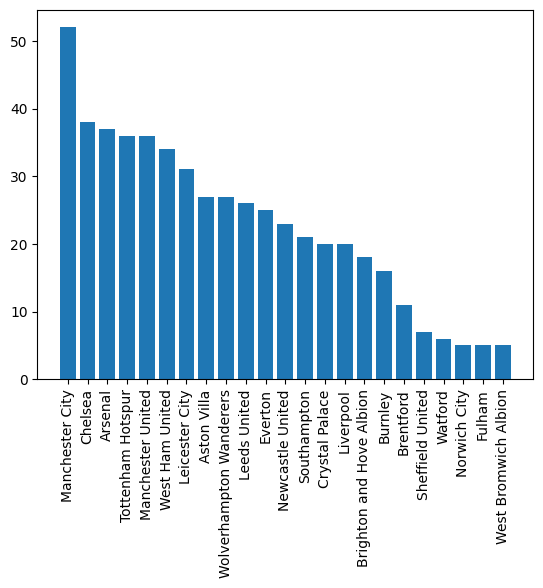

In [ ]:
#which team has the most winnings
teams=df[df['result'].isin(['W'])]['team'].value_counts()
#to include only the rows where the 'result' column has values of 'W'.
plt.bar(teams.index,teams.values)
plt.xticks(rotation=90)

In [ ]:
#datatypes
new_df.dtypes

round        object
venue        object
result       object
gf          float64
ga          float64
opponent     object
xg          float64
xga         float64
poss        float64
sh          float64
sot         float64
dist        float64
fk          float64
pk          float64
pkatt       float64
season        int64
team         object
dtype: object

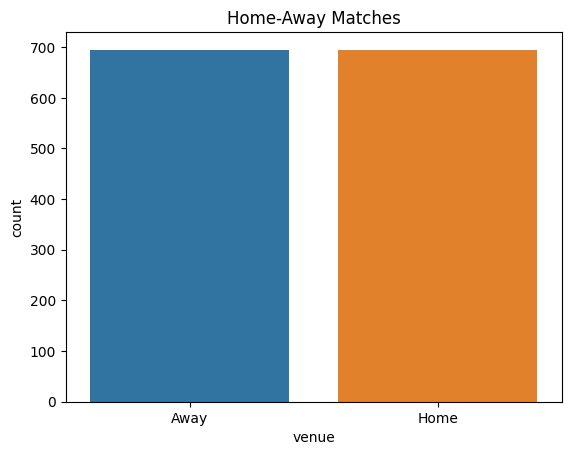

In [ ]:
#home and away matches
sns.countplot(x=df.venue)
plt.title('Home-Away Matches')
plt.show()

In [ ]:
#converting objects to numericals
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
new_df['round']=labelencoder.fit_transform(new_df['round'])
new_df['venue']=labelencoder.fit_transform(new_df['venue'])
new_df['result']=labelencoder.fit_transform(new_df['result'])
new_df['opponent']=labelencoder.fit_transform(new_df['opponent'])
new_df['team']=labelencoder.fit_transform(new_df['team'])

<ipython-input-319-3c591f36c2d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['round']=labelencoder.fit_transform(new_df['round'])
<ipython-input-319-3c591f36c2d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['venue']=labelencoder.fit_transform(new_df['venue'])
<ipython-input-319-3c591f36c2d4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [ ]:
new_df

,round,venue,result,gf,ga,opponent,xg,xga,poss,sh,sot,dist,fk,pk,pkatt,season,team
0,0,0,1,0.0,1.0,18,1.9,1.3,64.0,18.0,4.0,16.9,1.0,0.0,0.0,2022,12
1,11,1,2,5.0,0.0,15,2.7,0.1,67.0,16.0,4.0,17.3,1.0,0.0,0.0,2022,12
2,22,1,2,5.0,0.0,0,3.8,0.1,80.0,25.0,10.0,14.3,0.0,0.0,0.0,2022,12
3,32,0,2,1.0,0.0,10,2.9,0.8,61.0,25.0,8.0,14.0,0.0,0.0,0.0,2022,12
4,33,1,0,0.0,0.0,17,1.1,0.4,63.0,16.0,1.0,15.7,1.0,0.0,0.0,2022,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,27,0,1,0.0,4.0,18,0.5,2.0,34.0,8.0,1.0,17.4,0.0,0.0,0.0,2021,16
1385,28,1,1,0.0,2.0,6,0.7,2.1,50.0,7.0,0.0,11.4,1.0,0.0,0.0,2021,16
1386,29,0,2,1.0,0.0,7,1.6,1.3,38.0,10.0,3.0,17.0,0.0,0.0,0.0,2021,16
1387,30,0,1,0.0,1.0,14,0.8,1.5,50.0,11.0,1.0,16.0,1.0,0.0,0.0,2021,16


In [ ]:
#dtypes
new_df.dtypes

round         int64
venue         int64
result        int64
gf          float64
ga          float64
opponent      int64
xg          float64
xga         float64
poss        float64
sh          float64
sot         float64
dist        float64
fk          float64
pk          float64
pkatt       float64
season        int64
team          int64
dtype: object

In [ ]:
#checking missing vales
new_df.isna().sum()

round       0
venue       0
result      0
gf          0
ga          0
opponent    0
xg          0
xga         0
poss        0
sh          0
sot         0
dist        1
fk          0
pk          0
pkatt       0
season      0
team        0
dtype: int64

In [ ]:
#filling missing values
new_df['dist']=new_df['dist'].fillna(new_df['dist'].mean())
new_df.isna().sum()

<ipython-input-323-a16ae0dc32b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['dist']=new_df['dist'].fillna(new_df['dist'].mean())


round       0
venue       0
result      0
gf          0
ga          0
opponent    0
xg          0
xga         0
poss        0
sh          0
sot         0
dist        0
fk          0
pk          0
pkatt       0
season      0
team        0
dtype: int64

In [ ]:
#seperating x and y
x=new_df.drop(columns=['result']).values
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.022e+03,
        1.200e+01],
       [1.100e+01, 1.000e+00, 5.000e+00, ..., 0.000e+00, 2.022e+03,
        1.200e+01],
       [2.200e+01, 1.000e+00, 5.000e+00, ..., 0.000e+00, 2.022e+03,
        1.200e+01],
       ...,
       [2.900e+01, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.600e+01],
       [3.000e+01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.021e+03,
        1.600e+01],
       [3.100e+01, 1.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.600e+01]])

In [ ]:
y=new_df['result']
y

0       1
1       2
2       2
3       2
4       0
       ..
1384    1
1385    1
1386    2
1387    1
1388    2
Name: result, Length: 1389, dtype: int64

In [ ]:
#training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

IMPLIMENTING ALGORITHMS


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
model1=KNeighborsClassifier(n_neighbors=7)
model2=SVC()
model3=RandomForestClassifier()
model=[model1,model2,model3]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[ 43  26  29]
 [ 31 127  11]
 [ 23   6 121]]
0.697841726618705
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        98
           1       0.80      0.75      0.77       169
           2       0.75      0.81      0.78       150

    accuracy                           0.70       417
   macro avg       0.66      0.67      0.66       417
weighted avg       0.70      0.70      0.70       417

****************************************************************************************************
[[ 86   0  12]
 [  4 164   1]
 [  1   0 149]]
0.9568345323741008
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        98
           1       1.00      0.97      0.98       169
           2       0.92      0.99      0.96       150

    accuracy                           0.96       417
   macro avg       0.95      0.95      0.95       417
weighted avg       0.96      0.96      0.96       417

********

CREATING PREDICTORS

In [ ]:
#predictions
#since model3 random forest classifier has the highest accuracy so we use model4
pred=model3.predict(scaler.transform([[32,0,1.0,0.0,10,2.9,0.8,61.0,25.0,8.0,14.0,0.0,0.0,0.0,2022,12]]))
pred
if(pred>0):
  print('Win')
else:
  print('Lose')

Win
